In [1]:
# Importing Libraries

import numpy as np
import pandas as pd
import seaborn as sns

import matplotlib
import matplotlib.pyplot as plt

import pickle

from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import auc, roc_curve, roc_auc_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

from xgboost import XGBClassifier

from imblearn import under_sampling, over_sampling
from imblearn.over_sampling import SMOTE

import warnings
warnings.filterwarnings('ignore')

In [2]:
# Reading the 'probabilty of deafult' dataset

pd_df = pd.read_csv('cs-training.csv')

The dataset contains 12 features along with 150000 observations.

The description for the 12 features is given below:

Variable Name Description Type

SeriousDlqin2yrs Person experienced 90 days past due delinquency or worse Y/N

RevolvingUtilizationOfUnsecuredLines Total balance on credit cards and personal lines of credit except real estate and no installment debt like car loans divided by the sum of credit limits percentage

age Age of borrower in years integer

NumberOfTime3059DaysPastDueNotWorse Number of times borrower has been 30-59 days past due but no worse in the last 2 years. integer

DebtRatio Monthly debt payments, alimony,living costs divided by monthy gross income percentage

MonthlyIncome Monthly income real

NumberOfOpenCreditLinesAndLoans Number of Open loans (installment like car loan or mortgage) and Lines of credit (e.g. credit cards) integer

NumberOfTimes90DaysLate Number of times borrower has been 90 days or more past due. integer

NumberRealEstateLoansOrLines Number of mortgage and real estate loans including home equity lines of credit integer

NumberOfTime60-89DaysPastDueNotWorse Number of times borrower has been 60-89 days past due but no worse in the last 2 years. integer

NumberOfDependents Number of dependents in family excluding themselves (spouse, children etc.) integer

In [3]:
# Dimension of the data

print(pd_df.shape)

(150000, 12)


In [4]:
# Change first column name of pd_df from 'Unnamed: 0' to 'ID'

pd_df.rename(columns={'Unnamed: 0':'ID'}, inplace=True)

In [5]:
# To check if there is any duplicate values in the train set

print(pd_df.duplicated().value_counts()) # Output shows that there are no rows duplicated

False    150000
dtype: int64


### Classes in Target variable

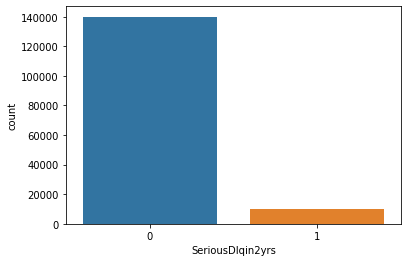

In [6]:
# Plot two type classes "0" and "1"

sns.countplot(x = 'SeriousDlqin2yrs', data = pd_df)
plt.show()

It can be seen that the classification results are extremely unbalanced, and the incident rate is as follows

In [7]:
P = pd_df.groupby('SeriousDlqin2yrs')['ID'].count().reset_index()
P['Percentage'] = 100 * P['ID'] / P['ID'].sum()
print(P)

   SeriousDlqin2yrs      ID  Percentage
0                 0  139974      93.316
1                 1   10026       6.684


Unbalanced data will cause the supervised learning algorithm to pay too much attention to the majority of classes and reduce the classification performance; because there are enough data, under-sampling is used; regular regression models and ensemble models are used

In [8]:
# Getting first five observations from pd_df dataset

pd_df.head()

,ID,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
0,1,1,0.766127,45,2,0.802982,9120.0,13,0,6,0,2.0
1,2,0,0.957151,40,0,0.121876,2600.0,4,0,0,0,1.0
2,3,0,0.658180,38,1,0.085113,3042.0,2,1,0,0,0.0
3,4,0,0.233810,30,0,0.036050,3300.0,5,0,0,0,0.0
4,5,0,0.907239,49,1,0.024926,63588.0,7,0,1,0,0.0


In [9]:
# Describing pd_df dataset

pd_df.describe()

,ID,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
count,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,1.202690e+05,150000.000000,150000.000000,150000.000000,150000.000000,146076.000000
mean,75000.500000,0.066840,6.048438,52.295207,0.421033,353.005076,6.670221e+03,8.452760,0.265973,1.018240,0.240387,0.757222
std,43301.414527,0.249746,249.755371,14.771866,4.192781,2037.818523,1.438467e+04,5.145951,4.169304,1.129771,4.155179,1.115086
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,37500.750000,0.000000,0.029867,41.000000,0.000000,0.175074,3.400000e+03,5.000000,0.000000,0.000000,0.000000,0.000000
50%,75000.500000,0.000000,0.154181,52.000000,0.000000,0.366508,5.400000e+03,8.000000,0.000000,1.000000,0.000000,0.000000
75%,112500.250000,0.000000,0.559046,63.000000,0.000000,0.868254,8.249000e+03,11.000000,0.000000,2.000000,0.000000,1.000000
max,150000.000000,1.000000,50708.000000,109.000000,98.000000,329664.000000,3.008750e+06,58.000000,98.000000,54.000000,98.000000,20.000000


### Handling missing value for pd_df dataset

In [10]:
print(pd_df.isnull().sum())

ID                                          0
SeriousDlqin2yrs                            0
RevolvingUtilizationOfUnsecuredLines        0
age                                         0
NumberOfTime30-59DaysPastDueNotWorse        0
DebtRatio                                   0
MonthlyIncome                           29731
NumberOfOpenCreditLinesAndLoans             0
NumberOfTimes90DaysLate                     0
NumberRealEstateLoansOrLines                0
NumberOfTime60-89DaysPastDueNotWorse        0
NumberOfDependents                       3924
dtype: int64


Handling missing value for 'MonthlyIncome' in pd_df dataset using RandomForest Regressor

The variable MonthlyIncome has many missing values, so the sample cannot be deleted directly, and there are not too many missing values to directly delete the attributes, so the missing values need to be filled. Here we use random forest prediction

In [11]:
def set_missing(df):

    process_df = df.iloc[:,[0,1,2,3,4,5,6,7,8,9,10,11]]
    known = process_df[process_df.MonthlyIncome.notnull()].values
    unknown = process_df[process_df.MonthlyIncome.isnull()].values

    X = known[:, [1,2,3,4,5,7,8,9,10]]
    y = known[:,[6]]
    
    # fit RandomForestRegressor
    rfr = RandomForestRegressor(random_state=0, 
    n_estimators=200,max_depth=3,n_jobs=-1)
    rfr.fit(X,y)

    # Use the obtained model to predict unknown values
    predicted = rfr.predict(unknown[:,[1,2,3,4,5,7,8,9,10]]).round(0)
    print(predicted)
    print(len(predicted))
    
    # MonthlyIncome missing value imputation
    df.loc[(df.MonthlyIncome.isnull()), 'MonthlyIncome'] = predicted
    return df

In [12]:
# Calling set_missing() to impute the missing value for 'MonthlyIncome' in pd_df dataset.
pd_df = set_missing(pd_df)

# Imputing missing value in 'NumberOfDependents' in the pd_df dataset using median().
#The variable NumberOfDependents has fewer missing values, and they are imputed using the median

pd_df['NumberOfDependents'].fillna(pd_df['NumberOfDependents'].median(), inplace = True)
pd_df.shape

# Describing pd_df dataset after handling missing values
pd_df.describe()

[8311. 1159. 8311. ... 1159. 2554. 2554.]
29731


,ID,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
count,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,1.500000e+05,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000
mean,75000.500000,0.066840,6.048438,52.295207,0.421033,353.005076,6.025803e+03,8.452760,0.265973,1.018240,0.240387,0.737413
std,43301.414527,0.249746,249.755371,14.771866,4.192781,2037.818523,1.300245e+04,5.145951,4.169304,1.129771,4.155179,1.107021
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,37500.750000,0.000000,0.029867,41.000000,0.000000,0.175074,2.554000e+03,5.000000,0.000000,0.000000,0.000000,0.000000
50%,75000.500000,0.000000,0.154181,52.000000,0.000000,0.366508,4.973000e+03,8.000000,0.000000,1.000000,0.000000,0.000000
75%,112500.250000,0.000000,0.559046,63.000000,0.000000,0.868254,8.076000e+03,11.000000,0.000000,2.000000,0.000000,1.000000
max,150000.000000,1.000000,50708.000000,109.000000,98.000000,329664.000000,3.008750e+06,58.000000,98.000000,54.000000,98.000000,20.000000


### Outlier detection and handling for each feature

#### 1. Age

It can be seen from the result of the describe() of the pd_df dataset that the minimum value of age is 0, which is an unreasonable value, and there are few such samples, so the abnormal samples are deleted directly

In [13]:
pd_df = pd_df[pd_df['age'] > 0]

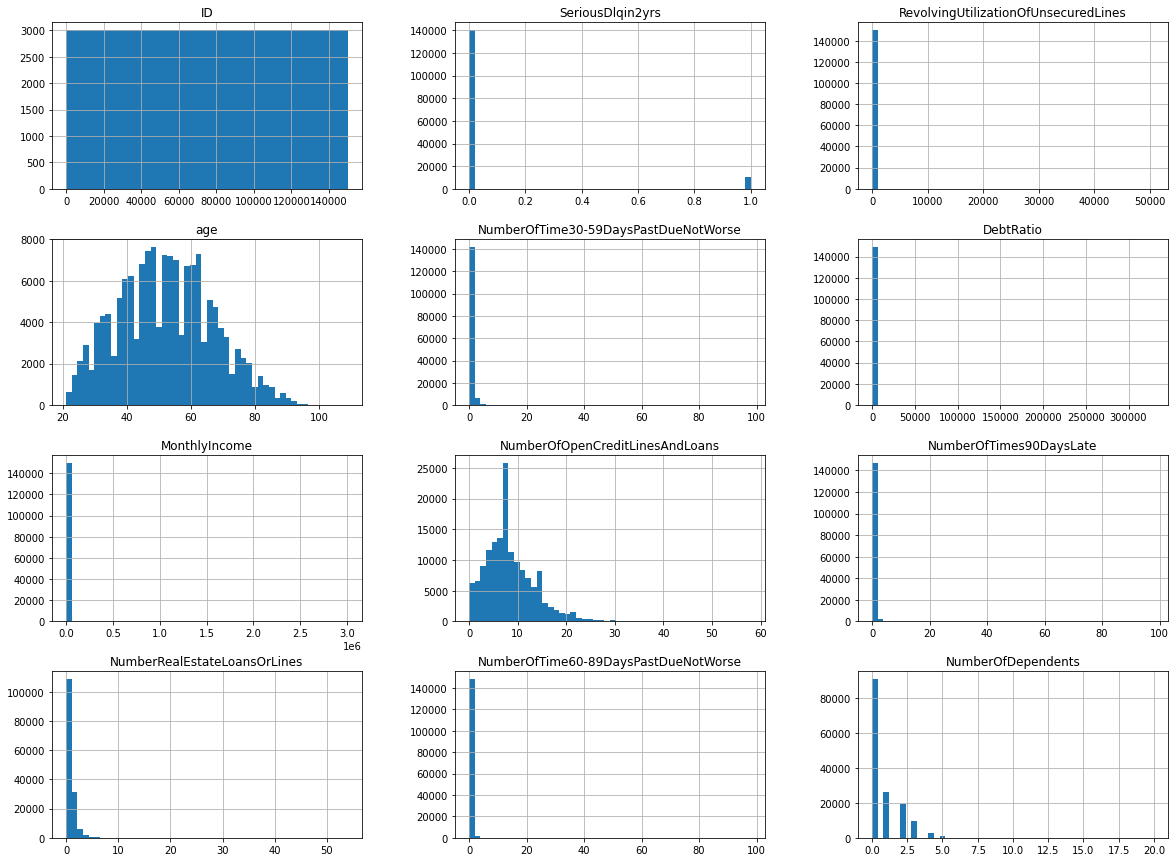

In [14]:
# Approximate data distribution

pd_df.hist(bins = 50, figsize = (20,15))
plt.show()

It can be seen that the data distribution of DebtRatio, NumberOfTime30-59DaysPastDueNotWorse, NumberOfTime60-89DaysPastDueNotWorse, NumberOfTimes90DaysLate, NumberRealEstateLoansOrLines, RevolvingUtilizationOfUnsecuredLines are abnormal, and there should be some extreme values that affect the presentation of the distributed image. Here we use box plots to check the distribution of values, delete extreme values, and check the correlation.

#### 2. Debt Ratio

<AxesSubplot:title={'center':'DebtRatio Distribution'}>

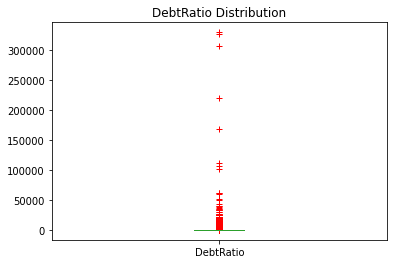

In [15]:
debt_ratio1 = pd_df["DebtRatio"]

debt_ratio1.plot(kind ='box', title = 'DebtRatio Distribution', sym = 'r+')

In [16]:
print(pd_df[pd_df['DebtRatio'] > 8000].count()) 

pd_df = pd_df[pd_df['DebtRatio'] < 8000]

ID                                      339
SeriousDlqin2yrs                        339
RevolvingUtilizationOfUnsecuredLines    339
age                                     339
NumberOfTime30-59DaysPastDueNotWorse    339
DebtRatio                               339
MonthlyIncome                           339
NumberOfOpenCreditLinesAndLoans         339
NumberOfTimes90DaysLate                 339
NumberRealEstateLoansOrLines            339
NumberOfTime60-89DaysPastDueNotWorse    339
NumberOfDependents                      339
dtype: int64


#### 3. MonthlyIncome

<AxesSubplot:title={'center':'MonthlyIncome Distribution'}>

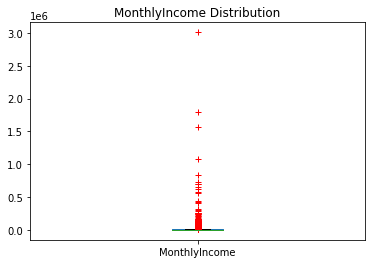

In [17]:
monthly_income1 = pd_df["MonthlyIncome"]
monthly_income1.plot(kind = 'box', title = 'MonthlyIncome Distribution', sym = 'r+')

In [18]:
print(pd_df[pd_df['MonthlyIncome'] > 50000].count())

pd_df = pd_df[pd_df['MonthlyIncome'] < 50000]

ID                                      301
SeriousDlqin2yrs                        301
RevolvingUtilizationOfUnsecuredLines    301
age                                     301
NumberOfTime30-59DaysPastDueNotWorse    301
DebtRatio                               301
MonthlyIncome                           301
NumberOfOpenCreditLinesAndLoans         301
NumberOfTimes90DaysLate                 301
NumberRealEstateLoansOrLines            301
NumberOfTime60-89DaysPastDueNotWorse    301
NumberOfDependents                      301
dtype: int64


#### 4. NumberOfDependents

<AxesSubplot:title={'center':'NumberOfDependents Distribution'}>

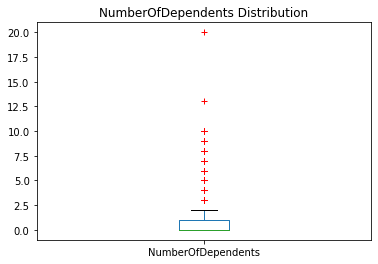

In [19]:
number_of_dependents1 = pd_df["NumberOfDependents"]
number_of_dependents1.plot(kind = 'box', title = 'NumberOfDependents Distribution', sym = 'r+')

In [20]:
print(pd_df[pd_df['NumberOfDependents'] > 10].count()) 

pd_df = pd_df[pd_df['NumberOfDependents'] < 10]

ID                                      2
SeriousDlqin2yrs                        2
RevolvingUtilizationOfUnsecuredLines    2
age                                     2
NumberOfTime30-59DaysPastDueNotWorse    2
DebtRatio                               2
MonthlyIncome                           2
NumberOfOpenCreditLinesAndLoans         2
NumberOfTimes90DaysLate                 2
NumberRealEstateLoansOrLines            2
NumberOfTime60-89DaysPastDueNotWorse    2
NumberOfDependents                      2
dtype: int64


#### 5.  NumberOfTime30-59DaysPastDueNotWorse & NumberOfTime60-89DaysPastDueNotWorse & NumberOfTimes90DaysLate

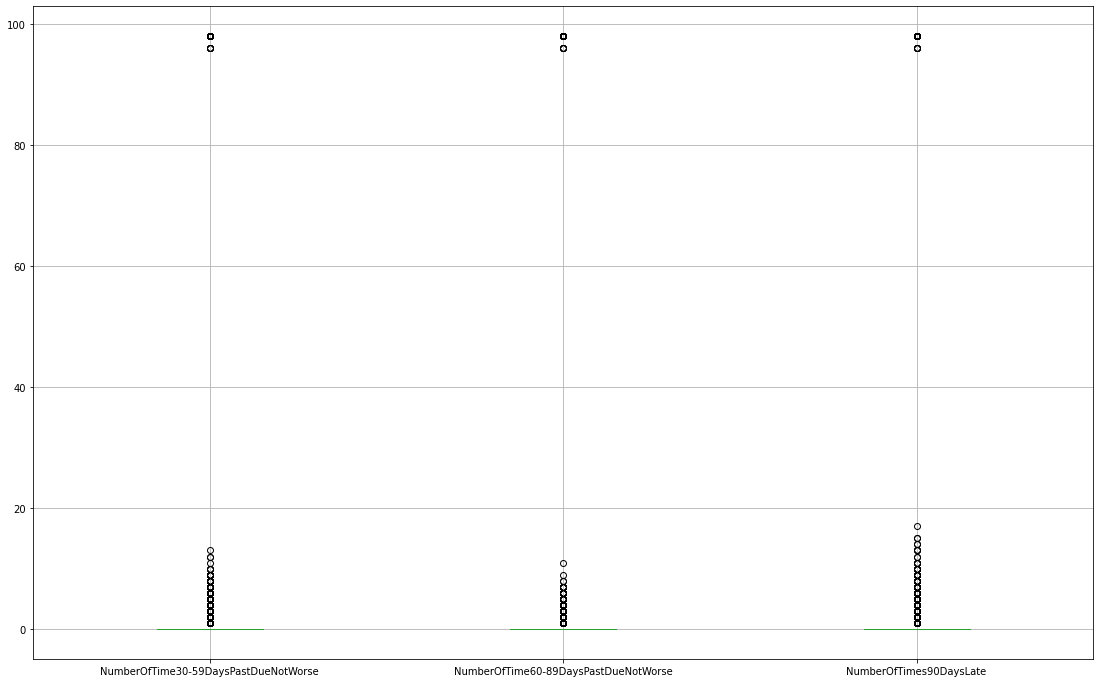

In [21]:
plt.figure(figsize = (19, 12)) 
pd_df[['NumberOfTime30-59DaysPastDueNotWorse', 'NumberOfTime60-89DaysPastDueNotWorse', 'NumberOfTimes90DaysLate']].boxplot()
plt.show()

In [22]:
print(pd_df[pd_df['NumberOfTime30-59DaysPastDueNotWorse'] > 20].count())

pd_df = pd_df[pd_df['NumberOfTime30-59DaysPastDueNotWorse'] < 20]

ID                                      269
SeriousDlqin2yrs                        269
RevolvingUtilizationOfUnsecuredLines    269
age                                     269
NumberOfTime30-59DaysPastDueNotWorse    269
DebtRatio                               269
MonthlyIncome                           269
NumberOfOpenCreditLinesAndLoans         269
NumberOfTimes90DaysLate                 269
NumberRealEstateLoansOrLines            269
NumberOfTime60-89DaysPastDueNotWorse    269
NumberOfDependents                      269
dtype: int64


#### 6. NumberRealEstateLoansOrLines

<AxesSubplot:title={'center':'NumberRealEstateLoansOrLines Distribution'}>

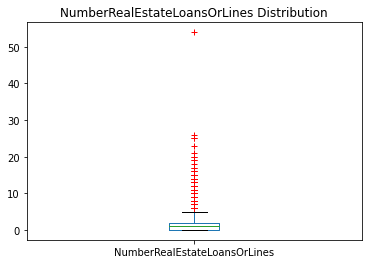

In [23]:
real_loans1 = pd_df["NumberRealEstateLoansOrLines"]
real_loans1.plot(kind = 'box', title = 'NumberRealEstateLoansOrLines Distribution', sym = 'r+')

In [24]:
print(pd_df[pd_df['NumberRealEstateLoansOrLines'] > 30].count())

pd_df = pd_df[pd_df['NumberRealEstateLoansOrLines'] < 30]

ID                                      1
SeriousDlqin2yrs                        1
RevolvingUtilizationOfUnsecuredLines    1
age                                     1
NumberOfTime30-59DaysPastDueNotWorse    1
DebtRatio                               1
MonthlyIncome                           1
NumberOfOpenCreditLinesAndLoans         1
NumberOfTimes90DaysLate                 1
NumberRealEstateLoansOrLines            1
NumberOfTime60-89DaysPastDueNotWorse    1
NumberOfDependents                      1
dtype: int64


#### 7. RevolvingUtilizationOfUnsecuredLines

<AxesSubplot:title={'center':'RevolvingUtilizationOfUnsecuredLines Distribution'}>

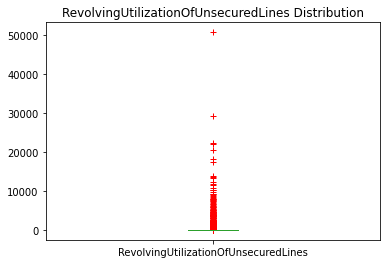

In [25]:
revolv1 = pd_df["RevolvingUtilizationOfUnsecuredLines"]
revolv1.plot(kind ='box', title = 'RevolvingUtilizationOfUnsecuredLines Distribution', sym = 'r+')

In [26]:
print(pd_df[pd_df['RevolvingUtilizationOfUnsecuredLines'] > 3].count()) 

pd_df = pd_df[pd_df['RevolvingUtilizationOfUnsecuredLines'] < 3]

ID                                      291
SeriousDlqin2yrs                        291
RevolvingUtilizationOfUnsecuredLines    291
age                                     291
NumberOfTime30-59DaysPastDueNotWorse    291
DebtRatio                               291
MonthlyIncome                           291
NumberOfOpenCreditLinesAndLoans         291
NumberOfTimes90DaysLate                 291
NumberRealEstateLoansOrLines            291
NumberOfTime60-89DaysPastDueNotWorse    291
NumberOfDependents                      291
dtype: int64


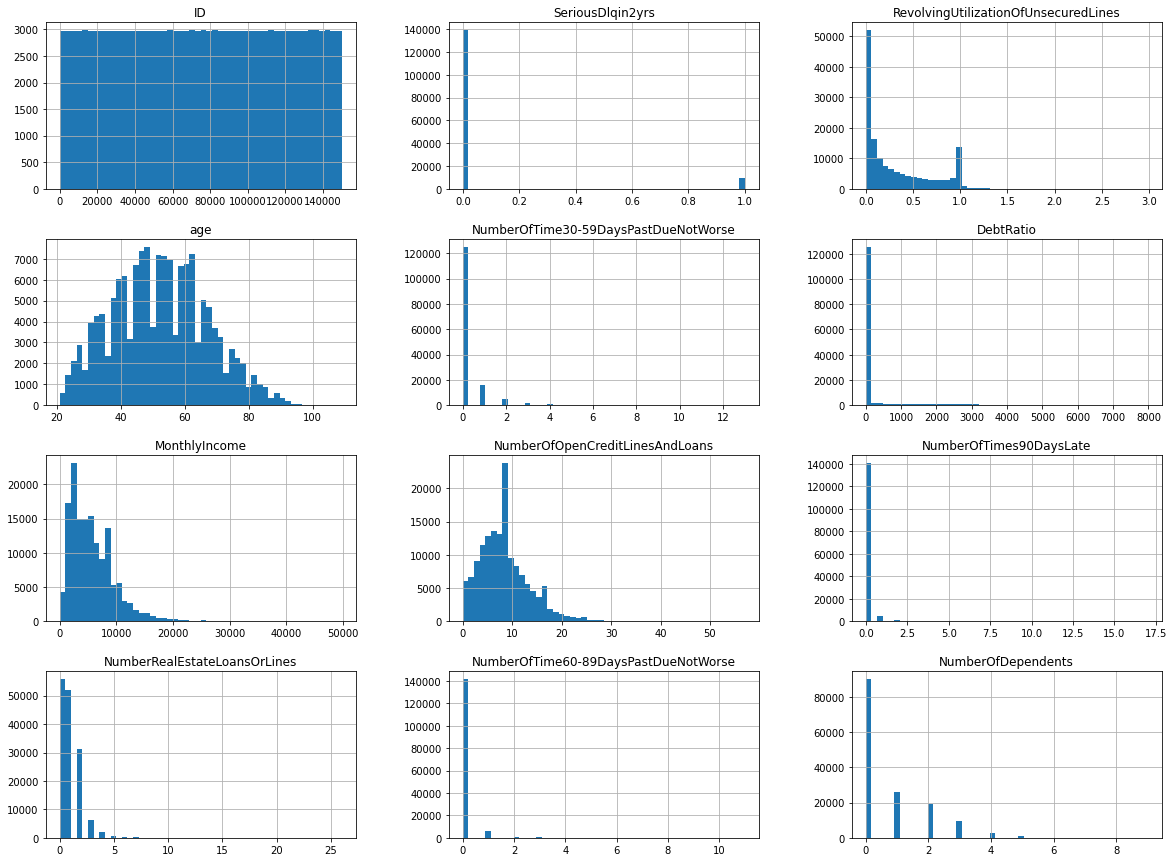

In [27]:
# pd_df data distribution after deleting outliers and extreme values

pd_df.hist(bins = 50, figsize = (20,15))
plt.show()

### Exploratory Analysis

The distribution of customer income and age is shown in the figure below. It can be seen that both variables are roughly normally distributed, which is in line with the assumptions of statistical analysis.

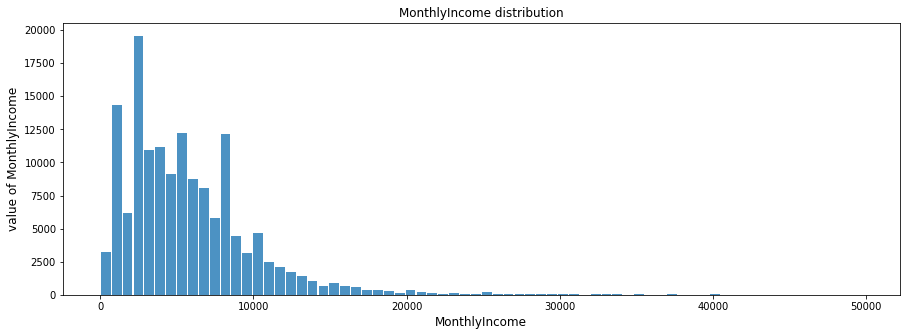

In [28]:
plt.figure(figsize = (15,5))
plt.hist(pd_df.MonthlyIncome, bins = 70, alpha = 0.8, rwidth=0.9)
plt.title("MonthlyIncome distribution")
plt.ylabel('value of MonthlyIncome', fontsize=12)
plt.xlabel('MonthlyIncome', fontsize=12)
 
plt.show()

<AxesSubplot:xlabel='MonthlyIncome', ylabel='Density'>

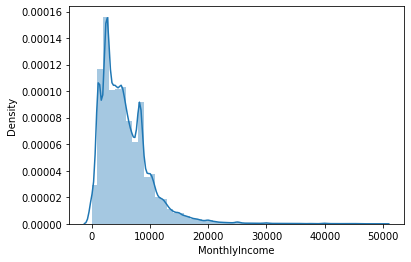

In [29]:
MI = pd_df['MonthlyIncome']
sns.distplot(MI)

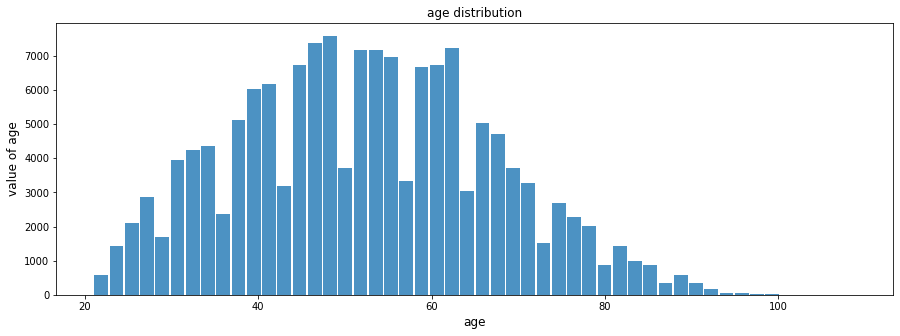

In [30]:
plt.figure(figsize = (15,5))
plt.hist(pd_df.age,bins=50, alpha = 0.8, rwidth = 0.9)
plt.title("age distribution")
plt.ylabel('value of age', fontsize = 12)
plt.xlabel('age', fontsize = 12)
 
plt.show()

<AxesSubplot:xlabel='age', ylabel='Density'>

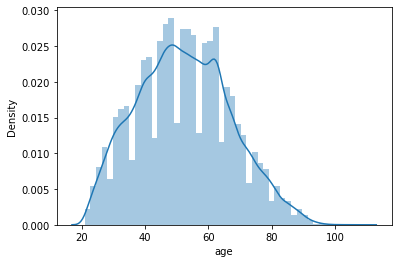

In [31]:
age = pd_df['age']
sns.distplot(age)

#### correlation

<AxesSubplot:>

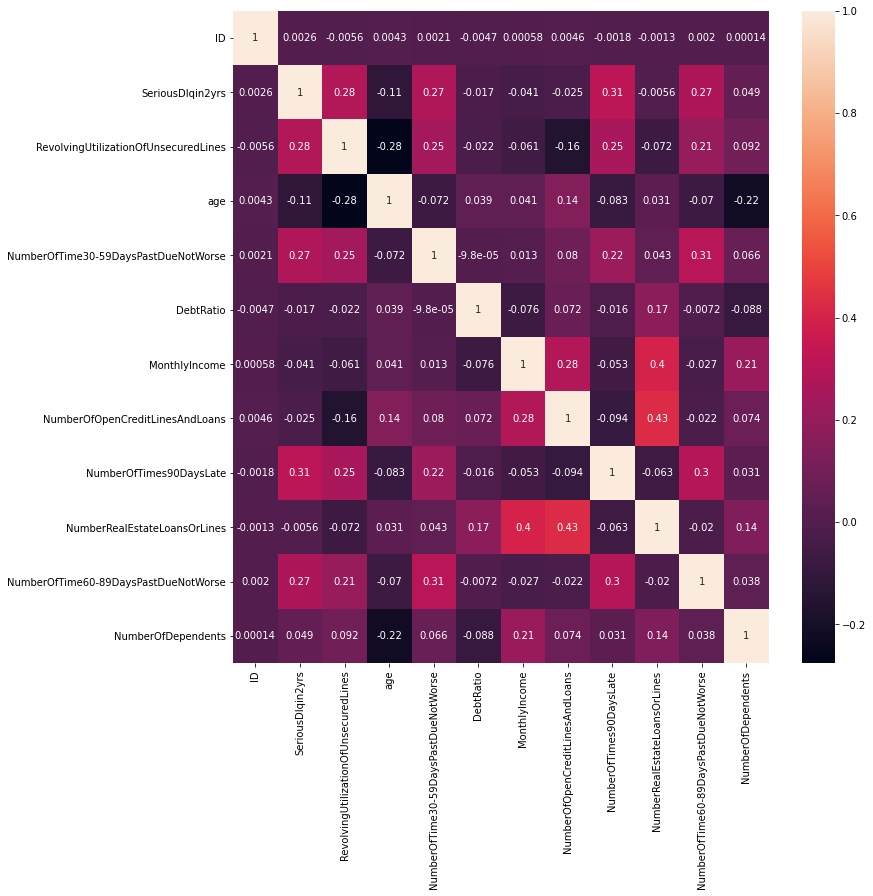

In [32]:
cor = pd_df.corr()
fig, ax = plt.subplots(figsize = (12,12))
sns.heatmap(cor, xticklabels = cor.columns, yticklabels = cor.columns, annot = True, ax = ax)

### Preparing the dataset for modelling

In [33]:
X = pd_df
y = pd_df['SeriousDlqin2yrs']

#### Splitting Data into train and test set in the ratio 80: 20

In [34]:
# Splitting data into train and test

X_train1, X_val1, y_train, y_val = train_test_split(X, y, test_size = 0.20, random_state = 568)

print(X_train1.shape)
print(X_val1.shape)
print(y_train.shape)
print(y_val.shape)

X_train = X_train1.drop(['SeriousDlqin2yrs', 'ID'],axis=1)
X_val = X_val1.drop(['SeriousDlqin2yrs', 'ID'],axis=1)

(119016, 12)
(29755, 12)
(119016,)
(29755,)


### XGBOOST

In [35]:
# Xgb model building
xgb = XGBClassifier(n_jobs=-1) 

# Use a grid over parameters of interest
param_grid = {
                  'n_estimators' :[100,150,200,250,300],
                  "learning_rate" : [0.001,0.01,0.0001,0.05, 0.10 ],
                  "gamma"            : [ 0.0, 0.1, 0.2 , 0.3 ],
                  "colsample_bytree" : [0.5,0.7],
                  'max_depth': [3,4,6,8]
              }

In [36]:
# Setting hyperparameters for the model

xgb_randomgrid = RandomizedSearchCV(xgb, param_distributions=param_grid, cv=5)

Fitting the model. Since the model takes too much time to train, insted of training the model each time, we save the fitted model as a pickle so that the trained model can be reused

In [37]:
# %%time
# xgb_randomgrid.fit(X_train, y_train)

[12:36:55] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[12:37:05] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[12:37:14] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[12:37:23] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

[12:43:45] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[12:43:56] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[12:44:07] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[12:44:18] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

RandomizedSearchCV(cv=5,
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None, gamma=None,
                                           gpu_id=None, importance_type='gain',
                                           interaction_constraints=None,
                                           learning_rate=None,
                                           max_delta_step=None, max_depth=None,
                                           min_child_weight=None, missing=nan,
                                           monotone_constraints=None,
                                           n_estimators=100,...1,
                                           num_parallel_tree=None,
                                           random_state=None, reg_alpha=None,
                                  

In [38]:
# Caluclating best estimator

# best_est = xgb_randomgrid.best_estimator_

In [39]:
# Save the trained model

model_name = 'xgb_model.pickle'
# pickle.dump(best_est, open(model_name, "wb"))

In [40]:
# Loading the saved model

best_est = pickle.load(open(model_name, 'rb'))

In [41]:
# Predicting probabilty of y_train using X_train values (To calculate actual vs predicted)

ytrain_pred = best_est.predict_proba(X_train)
ytrain_pred = ytrain_pred[:,1]

# predicting y_train
ytrain_predicted = best_est.predict(X_train)

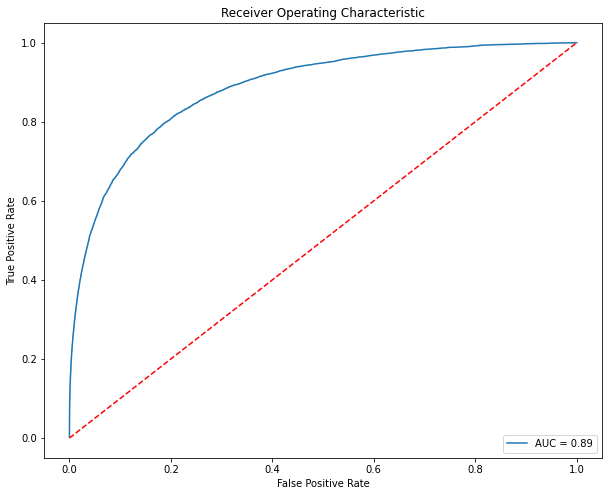

In [42]:
fpr,tpr,_ = roc_curve(y_train, ytrain_pred)
roc_auc = auc(fpr, tpr)
plt.figure(figsize=(10,8))
plt.title('Receiver Operating Characteristic')
sns.lineplot(fpr, tpr, label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [43]:
# Predicting probabilty of y_test using X_val values (To calculate actual vs predicted)
ytest_pred = best_est.predict_proba(X_val)
ytest_pred = ytest_pred[:,1]

# predicting y_test
ytest_predicted = best_est.predict(X_val)

In [44]:
# Create predicted output using trained dataset

pred_train_df = pd.DataFrame()
pred_train_df["ID"] = X_train1.iloc[:,0]
pred_train_df["Actual_pd_train"] = X_train1.iloc[:,1]
pred_train_df["Predict_pd_train"] = ytrain_predicted
pred_train_df["Predict_Probability_train"] = ytrain_pred

pred_train_df.head()

# Exporting result to csv file
pred_train_df.to_csv("Train_xgboost_predicted.csv")

In [45]:
# Create predicted output using test dataset

pred_test_df = pd.DataFrame()
pred_test_df["ID"] = X_val1.iloc[:,0]
pred_test_df["Actual_pd_test"] = X_val1.iloc[:,1]
pred_test_df["Predict_pd_test"] = ytest_predicted
pred_test_df["Predict_Probability_test"] = ytest_pred

pred_test_df.head()

# Exporting result to csv file
pred_test_df.to_csv("Test_xgboost_predicted.csv")

In [46]:
# Confusion matrix for trained xgboost model
confusion_matrix(y_train, ytrain_predicted)

array([[110921,    270],
       [  6513,   1312]], dtype=int64)

In [47]:
# Confusion matrix for test xgboost model
confusion_matrix(y_val, ytest_predicted)

array([[27647,   134],
       [ 1747,   227]], dtype=int64)

#### Evaluating performance of the model with classification report

In [48]:
print(classification_report(y_train, ytrain_predicted))

              precision    recall  f1-score   support

           0       0.94      1.00      0.97    111191
           1       0.83      0.17      0.28      7825

    accuracy                           0.94    119016
   macro avg       0.89      0.58      0.62    119016
weighted avg       0.94      0.94      0.92    119016



In [49]:
print(classification_report(y_val, ytest_predicted))

              precision    recall  f1-score   support

           0       0.94      1.00      0.97     27781
           1       0.63      0.11      0.19      1974

    accuracy                           0.94     29755
   macro avg       0.78      0.56      0.58     29755
weighted avg       0.92      0.94      0.92     29755



#### Check accuracy of the model

In [50]:
score = best_est.score(X_val, y_val)
print(score)

0.9367837338262477


### Random Forest using SMOTE

Imblearn techniques help to either upsample the minority class or downsample the majority class to match the equal proportion
Imbalanced classification involves developing predictive models on classification datasets that have a severe class imbalance.
SMOTE-One approach to addressing imbalanced datasets is to oversample the minority class. The simplest approach involves duplicating examples in the minority class, although these examples don’t add any new information to the model. 
Instead, new examples can be synthesized from the existing examples

In [51]:
smote = SMOTE(random_state = 0)
os_data_X, os_data_y = smote.fit_resample(X_train, y_train)

In [52]:
rfc = RandomForestClassifier(n_jobs=-1, max_features='sqrt') 
 
# Use a grid over parameters of interest
param_grid = { 
           "n_estimators" : [9, 18, 27, 36, 100, 150],
           "max_depth" : [2,3,5,7,9],
           "min_samples_leaf" : [2, 4]}

In [53]:
# Setting hyperparameters for the model

rfc_randomgrid = RandomizedSearchCV(rfc, param_distributions=param_grid, cv=5)

Fitting the model. Since the model takes too much time to train, insted of training the model each time, we save the fitted model as a pickle so that the trained model can be reused

In [54]:
# %%time
# rfc_randomgrid.fit(os_data_X, os_data_y)

Wall time: 4min 1s


RandomizedSearchCV(cv=5,
                   estimator=RandomForestClassifier(max_features='sqrt',
                                                    n_jobs=-1),
                   param_distributions={'max_depth': [2, 3, 5, 7, 9],
                                        'min_samples_leaf': [2, 4],
                                        'n_estimators': [9, 18, 27, 36, 100,
                                                         150]})

In [55]:
# Caluclating best estimator
# Estimator which gave highest score (or smallest loss if specified) on the left out data.

# best_est_rf = rfc_randomgrid.best_estimator_
# best_est_rf

RandomForestClassifier(max_depth=9, max_features='sqrt', min_samples_leaf=2,
                       n_estimators=150, n_jobs=-1)

In [56]:
# Save the trained model

model_name_rf = 'rfc_model.pickle'
# pickle.dump(best_est_rf, open(model_name_rf, "wb"))

In [57]:
# Loading the saved model

best_est_rf = pickle.load(open(model_name_rf, 'rb'))

In [58]:
# Predicting probabilty of y_train using X_train values (To calculate actual vs predicted)

ytrain_pred_rf = best_est_rf.predict_proba(X_train)
ytrain_pred_rf = ytrain_pred_rf[:,1]

# predicting y_train
ytrain_predicted_rf = best_est_rf.predict(X_train)

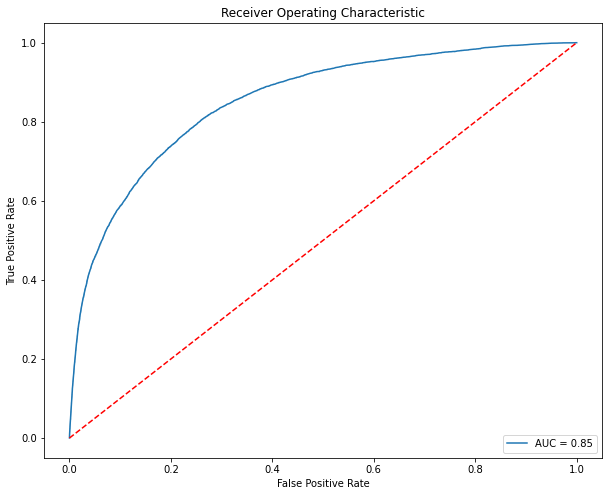

In [59]:
fpr,tpr,_ = roc_curve(y_train, ytrain_pred_rf)
roc_auc = auc(fpr, tpr)
plt.figure(figsize = (10,8))
plt.title('Receiver Operating Characteristic')
sns.lineplot(fpr, tpr, label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [60]:
# Predicting probabilty of y_test using X_val values (To calculate actual vs predicted)
ytest_pred_rf = best_est_rf.predict_proba(X_val)
ytest_pred_rf = ytest_pred_rf[:,1]

# predicting y_test
ytest_predicted_rf = best_est_rf.predict(X_val)

In [61]:
# Create predicted output using trained dataset

pred_train_rf_df = pd.DataFrame()
pred_train_rf_df["ID"] = X_train1.iloc[:,0]
pred_train_rf_df["Actual_pd_train"] = X_train1.iloc[:,1]
pred_train_rf_df["Predict_pd_rf_train"] = ytrain_predicted_rf
pred_train_rf_df["Predict_Probability_rf_train"] = ytrain_pred_rf

pred_train_rf_df.head()

# Exporting result to csv file
pred_train_rf_df.to_csv("Train_rf_predicted.csv")

In [62]:
# Create predicted output using test dataset

pred_test_rf_df = pd.DataFrame()
pred_test_rf_df["ID"] = X_val1.iloc[:,0]
pred_test_rf_df["Actual_pd_test"] = X_val1.iloc[:,1]
pred_test_rf_df["Predict_pd_rf_test"] = ytest_predicted_rf
pred_test_rf_df["Predict_Probability_rf_test"] = ytest_pred_rf

pred_test_rf_df.head()

# Exporting result to csv file
pred_test_rf_df.to_csv("Test_rf_predicted.csv")

In [63]:
# Confusion matrix for trained random forest model
confusion_matrix(y_train, ytrain_predicted_rf)

array([[92527, 18664],
       [ 2346,  5479]], dtype=int64)

In [64]:
# Confusion matrix for test random forest model
confusion_matrix(y_val, ytest_predicted_rf)

array([[22870,  4911],
       [  653,  1321]], dtype=int64)

#### Evaluating performance of the model with classification report

In [65]:
print(classification_report(y_train, ytrain_predicted_rf))

              precision    recall  f1-score   support

           0       0.98      0.83      0.90    111191
           1       0.23      0.70      0.34      7825

    accuracy                           0.82    119016
   macro avg       0.60      0.77      0.62    119016
weighted avg       0.93      0.82      0.86    119016



In [66]:
print(classification_report(y_val, ytest_predicted_rf))

              precision    recall  f1-score   support

           0       0.97      0.82      0.89     27781
           1       0.21      0.67      0.32      1974

    accuracy                           0.81     29755
   macro avg       0.59      0.75      0.61     29755
weighted avg       0.92      0.81      0.85     29755



#### Check accuracy of the model

In [67]:
score_rf = best_est_rf.score(X_val, y_val)
print(score_rf)

0.8130062174424466


### Logistic Regression

In [68]:
# Training the Logistic Model

logit = LogisticRegression(random_state=111, solver='saga', penalty='l1', class_weight='balanced', C=1.0, max_iter=500)

In [69]:
scaler = StandardScaler().fit(X_train)

In [70]:
X_train_scaled = scaler.transform(X_train)
X_val_scaled = scaler.transform(X_val)

In [71]:
logit.fit(X_train_scaled, y_train)

LogisticRegression(class_weight='balanced', max_iter=500, penalty='l1',
                   random_state=111, solver='saga')

In [72]:
# Predicting probabilty of y_train using X_train values (To calculate actual vs predicted)

ytrain_pred_lr = logit.predict_proba(X_train_scaled)
ytrain_pred_lr = ytrain_pred_lr[:,1]

# predicting y_train
ytrain_predicted_lr = logit.predict(X_train_scaled)

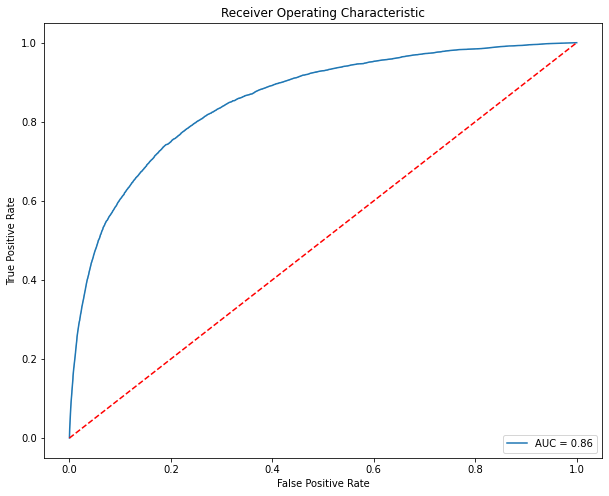

In [73]:
fpr,tpr,_ = roc_curve(y_train, ytrain_pred_lr)
roc_auc = auc(fpr, tpr)
plt.figure(figsize = (10,8))
plt.title('Receiver Operating Characteristic')
sns.lineplot(fpr, tpr, label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [74]:
# Predicting probabilty of y_test using X_val values (To calculate actual vs predicted)
ytest_pred_lr = logit.predict_proba(X_val_scaled)
ytest_pred_lr = ytest_pred_lr[:,1]

# predicting y_test
ytest_predicted_lr = logit.predict(X_val_scaled)

In [75]:
# Create predicted output using logistic regression in trained dataset

pred_train_lr_df = pd.DataFrame()
pred_train_lr_df["ID"] = X_train1.iloc[:,0]
pred_train_lr_df["Actual_pd_train"] = X_train1.iloc[:,1]
pred_train_lr_df["Predict_pd_lr_train"] = ytrain_predicted_lr
pred_train_lr_df["Predict_Probability_lr_train"] = ytrain_pred_lr

print(pred_train_lr_df.head())

# Exporting result to csv file
pred_train_lr_df.to_csv("Train_lr_predicted.csv")

            ID  Actual_pd_train  Predict_pd_lr_train  \
5996      5997                0                    0   
104501  104502                0                    0   
96213    96214                0                    1   
48840    48841                0                    0   
74228    74229                0                    1   

        Predict_Probability_lr_train  
5996                        0.395243  
104501                      0.405417  
96213                       0.993252  
48840                       0.471937  
74228                       0.518424  


In [76]:
# Create predicted output using logistic regression in test dataset

pred_test_lr_df = pd.DataFrame()
pred_test_lr_df["ID"] = X_val1.iloc[:,0]
pred_test_lr_df["Actual_pd_test"] = X_val1.iloc[:,1]
pred_test_lr_df["Predict_pd_rf_test"] = ytest_predicted_lr
pred_test_lr_df["Predict_Probability_rf_test"] = ytest_pred_lr

print(pred_test_lr_df.head())

# Exporting result to csv file
pred_test_lr_df.to_csv("Test_lr_predicted.csv")

            ID  Actual_pd_test  Predict_pd_rf_test  \
93991    93992               0                   0   
79618    79619               0                   0   
17059    17060               0                   0   
92241    92242               0                   1   
136382  136383               0                   0   

        Predict_Probability_rf_test  
93991                      0.418014  
79618                      0.069484  
17059                      0.123520  
92241                      0.612412  
136382                     0.229133  


In [77]:
# Confusion matrix for trained logistic regression model
confusion_matrix(y_train, ytrain_predicted_lr)

array([[90045, 21146],
       [ 2019,  5806]], dtype=int64)

In [78]:
# Confusion matrix for test logistic regression model
confusion_matrix(y_val, ytest_predicted_lr)

array([[22418,  5363],
       [  499,  1475]], dtype=int64)

#### Evaluating performance of the model with classification report

In [79]:
print(classification_report(y_train, ytrain_predicted_lr))

              precision    recall  f1-score   support

           0       0.98      0.81      0.89    111191
           1       0.22      0.74      0.33      7825

    accuracy                           0.81    119016
   macro avg       0.60      0.78      0.61    119016
weighted avg       0.93      0.81      0.85    119016



In [80]:
print(classification_report(y_val, ytest_predicted_lr))

              precision    recall  f1-score   support

           0       0.98      0.81      0.88     27781
           1       0.22      0.75      0.33      1974

    accuracy                           0.80     29755
   macro avg       0.60      0.78      0.61     29755
weighted avg       0.93      0.80      0.85     29755



#### Check accuracy of the model

In [81]:
score_lr = logit.score(X_val_scaled, y_val)
print(score_lr)

0.8029910939337926
